In [1]:
#imoport some packages to use 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

#To see our directory 
import os 
import random 
import gc #Gabage collector for cleanning data from memory 
from skimage import io, data_dir
from tensorflow.keras import callbacks
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train_dir = 'train1'
train_imgs = ['train1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

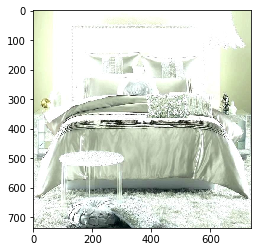

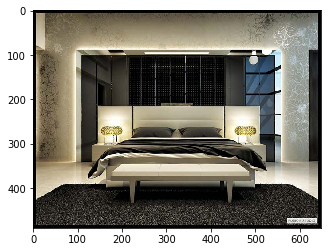

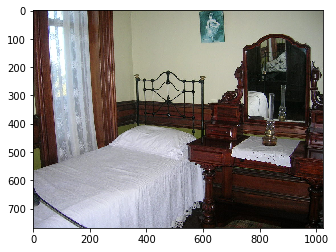

In [3]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [3]:
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import Dense
import pandas as pd

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg16 import decode_predictions

In [4]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(2271, 224, 224, 3)
<class 'numpy.ndarray'>
(330, 224, 224, 3)


In [5]:
# A function to read and process the images to an acceptable format for our model 
def read_and_process_images(list_of_images):
    #Returns one array
   
    #y is an array of labels
   
    y = [] # labels
    for image in list_of_images:
       
    
        if 'bathroom'  in image:
            if 'new' in image:
                y.append(0)
            else:  
                y.append(1)
        if 'bedroom'  in image:
            if 'new' in image:
                y.append(2)
            else: 
                y.append(3)
        if 'kitchen'  in image:
            if 'new' in image:
                y.append(4)
            if 'old' in image:
                y.append(5)
    return y

In [6]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)


2271
<class 'list'>
2271
<class 'numpy.ndarray'>
(2271,)
<class 'numpy.ndarray'>
(2271, 6)
330
<class 'list'>
330
<class 'numpy.ndarray'>
(330,)
<class 'numpy.ndarray'>
(330, 6)


In [10]:
print(test_y)

[[0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 ...
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]]


# VGG16_MODEL1

In [7]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test=model.predict(test_img)
print(features_train.shape)



(2271, 7, 7, 512)


In [9]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)
print(len(X_train))
print(X_train.shape)

1589
(1589, 25088)


In [ ]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=6))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=64,epochs=10,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])


In [ ]:
#save the model 
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()




In [15]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)


(330, 6)
(330, 6)


In [24]:
Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)


Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)


<class 'list'>
(330,)
<class 'numpy.ndarray'>
[2 3 5 3 5 5 0 4 2 5 2 3 0 0 0 0 5 1 2 3 3 5 5 4 0 1 2 3 1 0 4 5 1 4 4 1 4
 5 4 0 0 0 3 0 3 3 0 0 2 1 3 1 5 1 5 1 2 0 1 1 5 4 1 4 0 0 0 4 4 5 1 0 1 4
 5 5 2 2 3 1 5 1 0 3 2 5 3 4 5 2 0 3 2 1 3 3 4 5 1 4 1 0 1 2 5 2 3 1 4 3 4
 4 3 4 4 0 0 5 4 3 1 2 1 0 2 1 0 4 4 1 0 0 0 3 0 5 1 2 5 1 0 3 4 5 5 4 0 5
 5 3 3 2 5 5 5 4 1 4 1 4 1 5 0 1 3 0 5 2 1 5 3 5 0 5 4 0 2 1 2 5 2 1 0 2 5
 1 5 5 3 5 4 0 0 1 5 4 1 1 0 0 0 0 3 2 1 3 1 0 4 2 0 0 2 1 5 2 4 2 3 0 4 5
 4 3 2 5 2 2 5 4 0 0 1 4 5 2 2 2 1 3 1 1 4 5 4 1 4 0 2 0 0 5 0 0 2 1 5 2 2
 3 0 0 4 2 2 5 4 5 3 0 2 5 4 3 2 4 5 1 0 4 5 2 4 5 3 3 3 4 4 5 1 2 4 0 4 5
 2 5 3 4 4 0 5 0 2 2 1 0 1 1 3 5 1 4 3 5 0 0 2 4 0 3 0 3 4 1 4 3 1 3]
<class 'list'>
(330,)
<class 'numpy.ndarray'>
[2 3 5 3 5 5 0 4 2 5 2 3 0 0 0 0 3 1 2 3 3 5 5 4 0 1 2 3 0 0 4 5 1 4 4 1 4
 5 4 0 0 0 3 0 3 3 0 0 0 1 3 1 5 1 5 1 2 4 1 1 5 4 1 4 0 0 0 4 4 5 1 0 1 4
 0 5 4 2 3 1 0 1 0 3 2 5 3 4 5 2 0 3 2 1 3 3 4 5 1 4 1 0 0 2 5 2 3 1 4 3 4
 4 3 4 4 0 0 

0.8575757575757575

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[53,  4,  1,  0,  0,  2],
       [ 9, 47,  0,  0,  0,  4],
       [ 0,  0, 41,  5,  0,  4],
       [ 1,  2,  4, 39,  0,  4],
       [ 1,  0,  2,  1, 56,  0],
       [ 1,  2,  0,  0,  0, 47]])

# Data Augumenation 1

In [8]:
train_dir = 'trainpreview'
train_imgs = ['trainpreview/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test = len(test_imgs)


In [9]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)



<class 'numpy.ndarray'>
(9076, 224, 224, 3)


In [10]:
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(330, 224, 224, 3)


In [11]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)

test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)



9076
<class 'list'>
9076
<class 'numpy.ndarray'>
(9076,)
<class 'numpy.ndarray'>
(9076, 6)
330
<class 'list'>
330
<class 'numpy.ndarray'>
(330,)
<class 'numpy.ndarray'>
(330, 6)


In [12]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)

features_test=model.predict(test_img)
print(features_train.shape)



(9076, 7, 7, 512)


In [27]:
train_x=features_train.reshape(length_train,25088)
test_x=features_test.reshape(length_test,25088)
# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.2, random_state=42)
print(len(X_train))
print(X_train.shape)

7260
(7260, 25088)


In [ ]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=6))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 


es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=64,epochs=10,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])



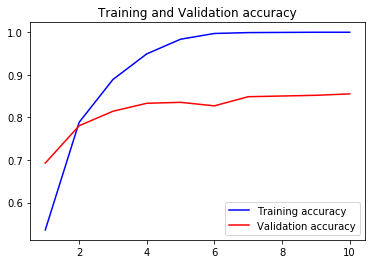

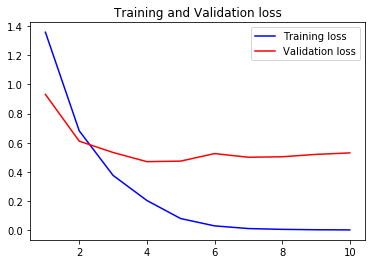

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')

plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [42]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)



(330, 6)
(330, 6)


In [43]:
pred_y=model.predict(test_img)
print(test_y.shape)
print(pred_y.shape)

Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)


Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)




<class 'list'>
(330,)
<class 'numpy.ndarray'>
[4 2 2 2 1 3 4 5 1 3 4 0 0 1 3 1 1 0 2 2 1 5 0 4 4 3 0 5 0 2 1 1 2 0 3 5 4
 4 1 1 1 1 2 3 0 5 0 3 3 2 4 2 4 0 4 3 1 0 2 0 0 3 1 4 4 0 2 4 5 4 0 1 4 0
 3 4 1 5 1 5 5 4 4 4 2 2 2 0 5 2 2 0 2 5 2 1 5 0 0 0 5 1 1 0 1 2 3 5 4 5 3
 1 5 0 3 2 1 5 4 0 3 0 2 0 0 3 4 0 0 1 2 5 2 3 1 5 0 1 4 5 4 4 0 1 0 4 0 1
 2 5 0 2 0 1 0 1 4 5 4 2 0 5 2 0 1 5 0 5 4 1 0 5 4 2 4 5 0 2 3 0 5 4 1 0 2
 3 4 1 0 4 0 3 2 1 5 3 2 0 1 0 5 2 3 2 3 4 4 3 2 2 1 1 0 3 1 4 5 4 3 5 4 0
 0 5 3 5 0 4 0 0 4 4 4 5 5 1 1 2 2 5 0 2 1 5 1 1 2 2 3 3 5 3 0 1 0 0 2 3 1
 0 5 3 3 2 3 1 2 3 0 5 1 1 1 4 2 3 4 4 3 1 1 3 3 5 5 3 2 0 4 4 1 0 1 2 2 0
 2 4 0 4 0 3 0 3 4 5 5 3 4 5 2 5 0 3 5 2 2 1 5 0 1 3 4 0 4 5 5 5 3 5]
<class 'list'>
(330,)
<class 'numpy.ndarray'>
[4 2 2 2 1 3 4 5 1 3 4 0 0 1 3 1 1 0 2 3 1 5 0 4 4 3 0 3 0 2 1 0 2 0 3 5 4
 4 1 1 1 1 2 2 0 3 0 3 3 2 4 2 4 0 4 3 0 1 2 0 0 3 1 4 4 0 3 4 5 4 0 1 4 0
 3 4 1 5 1 5 5 4 4 4 2 2 2 0 5 2 2 0 2 5 2 1 5 4 0 0 5 1 1 4 1 2 3 5 4 5 4
 0 5 0 3 2 1 

0.8636363636363636

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[51,  4,  3,  0,  0,  2],
       [ 7, 50,  0,  0,  0,  3],
       [ 0,  0, 41,  6,  0,  3],
       [ 0,  1,  7, 38,  0,  4],
       [ 2,  0,  2,  1, 55,  0],
       [ 1,  3,  0,  0,  0, 46]])

# Batchsize  = 8 

In [44]:
train_dir = 'trainpreview1'
train_imgs = ['trainpreview1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)


In [45]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)


print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(18037, 224, 224, 3)
<class 'numpy.ndarray'>
(330, 224, 224, 3)


In [46]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)



18037
<class 'list'>
18037
<class 'numpy.ndarray'>
(18037,)
<class 'numpy.ndarray'>
(18037, 6)
330
<class 'list'>
330
<class 'numpy.ndarray'>
(330,)
<class 'numpy.ndarray'>
(330, 6)


In [47]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test=model.predict(test_img)
print(features_train.shape)




(18037, 7, 7, 512)


In [56]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.1, random_state=42)
print(len(X_train))
print(X_train.shape)

16233
(16233, 25088)


In [ ]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=6))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=64,epochs=10,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])




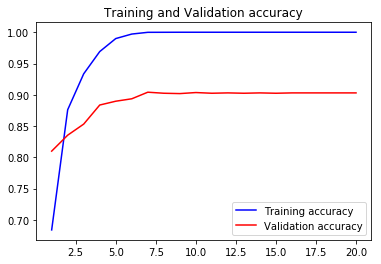

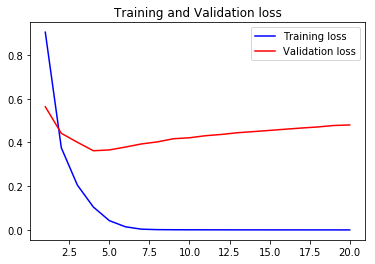

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [67]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)




(330, 6)
(330, 6)


In [68]:
pred_y=model.predict(test_img)
print(test_y.shape)
print(pred_y.shape)

Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)


Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)





<class 'list'>
(330,)
<class 'numpy.ndarray'>
[3 4 4 2 2 4 1 0 3 0 3 0 4 0 5 4 4 1 1 0 1 2 0 2 0 0 5 0 4 5 1 0 3 2 3 4 3
 1 3 5 4 2 4 5 5 0 2 3 4 1 3 3 0 3 4 0 0 1 3 4 4 5 4 5 3 2 2 4 2 1 2 2 0 5
 1 3 5 0 2 0 3 2 0 1 3 1 1 0 0 4 4 0 5 3 1 5 5 4 3 2 3 3 0 4 1 5 4 3 3 0 3
 1 2 5 0 1 0 0 3 0 5 4 5 1 1 1 0 2 0 0 0 0 1 3 0 2 1 2 5 1 2 3 1 3 3 2 5 4
 0 0 0 1 3 5 3 2 1 3 2 2 2 5 5 1 1 1 0 2 5 5 0 0 2 1 4 0 2 2 5 2 3 5 4 1 1
 5 3 4 1 2 5 1 3 3 5 1 1 1 0 4 0 5 2 0 5 0 4 0 4 1 0 4 3 1 0 0 1 4 2 5 3 0
 1 4 5 1 0 0 5 5 5 4 1 1 4 2 0 2 2 2 2 0 5 1 3 4 5 3 5 4 5 2 2 1 5 2 3 5 2
 0 4 0 2 3 3 1 5 5 5 4 3 3 3 2 0 0 2 5 4 4 3 0 0 3 0 1 2 0 4 3 4 4 1 0 2 4
 4 2 4 5 0 2 2 5 1 4 4 3 5 1 2 0 0 0 0 4 4 5 4 0 1 4 4 1 0 4 4 3 1 4]
<class 'list'>
(330,)
<class 'numpy.ndarray'>
[3 4 4 2 3 4 1 0 3 0 3 0 4 0 5 4 4 1 3 0 1 2 0 2 0 0 5 0 4 5 0 0 3 3 3 4 3
 1 3 5 4 2 4 5 5 0 2 3 4 1 3 5 0 3 4 0 0 1 3 4 4 5 4 5 2 2 2 4 2 5 2 2 1 5
 1 3 5 0 3 0 3 2 0 1 3 1 1 0 0 4 4 0 1 3 1 5 5 4 4 2 3 2 0 4 0 5 4 3 2 0 2
 1 2 5 0 1 0 

0.8636363636363636

In [69]:

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[55,  4,  1,  0,  0,  0],
       [12, 46,  0,  0,  0,  2],
       [ 0,  0, 43,  6,  0,  1],
       [ 0,  1,  5, 41,  0,  3],
       [ 1,  0,  2,  1, 56,  0],
       [ 1,  3,  0,  2,  0, 44]])